# Comparative Impact Analysis of Proposed Endoscopy Sites by Cluster Count (k = 3 to 7)

This notebook evaluates the spatial and service impact of proposed endoscopy sites generated via clustering underserved LSOAs with cluster counts ranging from 3 to 7. It compares how cluster resolution affects:

- Geographic coverage and distribution of proposed sites
- Accessibility improvements measured by reachable endoscopy rooms within 60 minutes
- Competition-adjusted service capacity per 100k population aged 50–74
- Accessibility tier changes (Low, Marginal, Adequate, No Access)

The analysis informs the choice of cluster number for strategic planning of new facilities balancing coverage, efficiency, and equity.

---


In [1]:
# ----------------------------------------------------------
# Step 0 – Imports, File Paths, and Script Path Setup
# ----------------------------------------------------------

import os
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Optional display settings
import warnings
warnings.filterwarnings("ignore")

# Add custom script directory to system path if needed
script_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand/scripts"
if script_dir not in sys.path:
    sys.path.append(script_dir)

# Define base data directories
base_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand"
data_dir = os.path.join(base_dir, "data", "raw")
proc_dir = os.path.join(base_dir, "data", "processed", "endoscopy")
modality_dir = os.path.join(data_dir, "modality_modelling")

# File paths
gpkg_path = os.path.join(data_dir, "LSOA_5-year_segment_master.gpkg")
travel_csv_path = os.path.join(data_dir, "LSOA_to_LSOA_complete.csv")
modality_counts_path = os.path.join(data_dir, "modality_procedure_counts_by_age_band_2024.csv")
facilities_path = os.path.join(proc_dir, "facilities_with_proposed_sites.gpkg")

# Define paths to all versions
baseline_path = os.path.join(proc_dir, "facilities_with_geometry.gpkg")
scenario_files = {
    "V3": os.path.join(proc_dir, "facilities_with_proposed_sites_k3.gpkg"),
    "V4": os.path.join(proc_dir, "facilities_with_proposed_sites_k4.gpkg"),
    "V5": os.path.join(proc_dir, "facilities_with_proposed_sites_k5.gpkg"),
    "V6": os.path.join(proc_dir, "facilities_with_proposed_sites_k6.gpkg"),
    "V7": os.path.join(proc_dir, "facilities_with_proposed_sites_k7.gpkg"),
}


In [2]:
# -------------------------------
# Load Baseline Facilities
# -------------------------------

print("\nLoading Baseline facilities...")

baseline_path = os.path.join(proc_dir, "facilities_with_geometry.gpkg")
baseline_gdf = gpd.read_file(baseline_path)

# Filter and clean
baseline_gdf = baseline_gdf[baseline_gdf["Endoscopy Rooms"] >= 1].copy()
baseline_gdf["lsoa21cd"] = baseline_gdf["lsoa21cd"].astype(str)
baseline_gdf["Endoscopy Rooms"] = baseline_gdf["Endoscopy Rooms"].astype(float)

# Preview
print(f"→ {len(baseline_gdf)} facilities in Baseline")
display(baseline_gdf[["Name", "Endoscopy Rooms", "source", "lsoa21cd"]].head())

# -------------------------------
# Load Facilities per Scenario and Combine with Baseline
# -------------------------------

facilities_by_scenario = {
    "Baseline": baseline_gdf  # Start with just the baseline
}

for scen, path in scenario_files.items():
    print(f"\nLoading facilities for {scen}...")

    # Load proposed-only GPKG
    proposed_gdf = gpd.read_file(path)
    proposed_gdf = proposed_gdf[proposed_gdf["Endoscopy Rooms"] >= 1].copy()
    proposed_gdf["lsoa21cd"] = proposed_gdf["lsoa21cd"].astype(str)
    proposed_gdf["Endoscopy Rooms"] = proposed_gdf["Endoscopy Rooms"].astype(float)

    # Combine with baseline
    combined_gdf = pd.concat([baseline_gdf, proposed_gdf], ignore_index=True)

    # Store
    facilities_by_scenario[scen] = combined_gdf

    print(f"→ {len(combined_gdf)} total facilities in {scen} (including Baseline)")
    display(combined_gdf[["Name", "Endoscopy Rooms", "source", "lsoa21cd"]].head())



Loading Baseline facilities...
→ 32 facilities in Baseline


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V3...
→ 35 total facilities in V3 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V4...
→ 36 total facilities in V4 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V5...
→ 37 total facilities in V5 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V6...
→ 38 total facilities in V6 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V7...
→ 39 total facilities in V7 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115


In [3]:
# ----------------------------------------------------------
# Step 2 – Load LSOA Population Data (Age 50–74) from GPKG
# ----------------------------------------------------------

# Load full LSOA demographic GeoDataFrame
lsoa_gdf = gpd.read_file(gpkg_path)

# Define required 5-year age columns for age 50–74
age_cols_50_74 = ["age_50_54", "age_55_59", "age_60_64", "age_65_69", "age_70_74"]

# Validate column presence
missing_cols = [col for col in age_cols_50_74 if col not in lsoa_gdf.columns]
if missing_cols:
    raise ValueError(f"Missing expected age columns: {missing_cols}")

# Calculate total population aged 50–74
lsoa_gdf["pop_50_74"] = lsoa_gdf[age_cols_50_74].sum(axis=1)

# Create simplified version for joining
lsoa_pop = lsoa_gdf[["lsoa21cd", "pop_50_74", "geometry"]].copy()
lsoa_pop["lsoa21cd"] = lsoa_pop["lsoa21cd"].astype(str)

# Preview result
print(f"LSOA population GeoDataFrame loaded: {lsoa_pop.shape[0]} rows")
display(lsoa_pop.head())


LSOA population GeoDataFrame loaded: 3451 rows


,lsoa21cd,pop_50_74,geometry
0,E01020484,568.83,"MULTIPOLYGON (((401918.077 78945.278, 401919.4..."
1,E01020481,643.13,"MULTIPOLYGON (((403211.07 78762.983, 403211.07..."
2,E01020482,608.53,"MULTIPOLYGON (((403126.904 78828.641, 403127.4..."
3,E01020479,419.26,"MULTIPOLYGON (((403027.597 79673.678, 403027.8..."
4,E01020478,464.03,"MULTIPOLYGON (((402493.1 79584.202, 402511.903..."


In [29]:
# ----------------------------------------------------------
# Step 3 – Load and Filter Travel Matrix per Scenario (< 60 Minutes by Car)
# ----------------------------------------------------------

# Load full travel matrix once
travel_df = pd.read_csv(travel_csv_path)

# Ensure clean types
travel_df["origin_name"] = travel_df["origin_name"].astype(str)
travel_df["destination_name"] = travel_df["destination_name"].astype(str)

# Prepare dictionary to store filtered travel matrices (including Baseline)
travel_by_scenario = {}

for scen, fac_gdf in facilities_by_scenario.items():
    print(f"\nProcessing travel matrix for {scen}...")

    # Extract valid destination LSOAs for this scenario
    valid_dest_lsoas = fac_gdf["lsoa21cd"].unique()

    # Filter travel matrix
    df = travel_df[
        (travel_df["destination_name"].isin(valid_dest_lsoas)) &
        (travel_df["travel_time_car"] < 60)
    ].copy()

    # Store filtered matrix
    travel_by_scenario[scen] = df

    # Confirm output
    print(f"  → {df.shape[0]:,} OD pairs retained (<60 mins to valid facility)")
    print(f"  → Max car travel time: {df['travel_time_car'].max():.2f} minutes")
    display(df.head())



Processing travel matrix for Baseline...
  → 18,398 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V3...
  → 20,466 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
643,E01020158,E01018787,33.576196,93.066196,94.876196
703,E01020159,E01018787,27.902302,95.532302,97.342302
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978



Processing travel matrix for V4...
  → 20,758 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V5...
  → 21,664 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V6...
  → 21,809 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V7...
  → 22,397 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568


In [30]:
# ----------------------------------------------------------
# Step 4 – Merge LSOA 50–74 Population into Travel Matrix (< 60 min)
# ----------------------------------------------------------

# Store updated versions with population added
travel_with_pop_by_scenario = {}

for scen, travel_df_60 in travel_by_scenario.items():
    print(f"\nMerging population into travel matrix for {scen}...")

    # Join population onto origin LSOA
    merged_df = travel_df_60.merge(
        lsoa_pop[["lsoa21cd", "pop_50_74"]],
        how="left",
        left_on="origin_name",
        right_on="lsoa21cd"
    )

    # Fill any missing population values with 0
    missing_pop = merged_df["pop_50_74"].isna().sum()
    if missing_pop > 0:
        print(f"  Warning: {missing_pop} origin LSOAs missing population – filling with 0")
        merged_df["pop_50_74"] = merged_df["pop_50_74"].fillna(0)

    # Drop redundant join column
    merged_df = merged_df.drop(columns=["lsoa21cd"])

    # Store scenario result
    travel_with_pop_by_scenario[scen] = merged_df

    # Confirm
    print(f"  → Final shape: {merged_df.shape}")
    display(merged_df.head())



Merging population into travel matrix for Baseline...
  → Final shape: (18398, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V3...
  → Final shape: (20466, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01020158,E01018787,33.576196,93.066196,94.876196,811.02
1,E01020159,E01018787,27.902302,95.532302,97.342302,622.77
2,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
3,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
4,E01032069,E01014444,42.010978,93.380978,93.380978,490.48



Merging population into travel matrix for V4...
  → Final shape: (20758, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V5...
  → Final shape: (21664, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V6...
  → Final shape: (21809, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V7...
  → Final shape: (22397, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70


In [32]:
# ----------------------------------------------------------
# Step 5 – Merge Endoscopy Room Counts by Destination LSOA (per Scenario)
# ----------------------------------------------------------

# Dictionary to hold travel matrices with demand + supply merged
travel_ready_by_scenario = {}

for scen in travel_with_pop_by_scenario.keys():
    print(f"\nMerging reachable room supply for {scen}...")

    # Copy the travel matrix with population
    travel_df = travel_with_pop_by_scenario[scen].copy()
    fac_gdf = facilities_by_scenario[scen]

    # Create lookup of room counts per destination LSOA
    room_lookup = (
        fac_gdf[["lsoa21cd", "Endoscopy Rooms"]]
        .groupby("lsoa21cd", as_index=False)
        .sum()
        .rename(columns={
            "lsoa21cd": "destination_name",
            "Endoscopy Rooms": "rooms_at_destination"
        })
    )

    # Merge room counts onto travel matrix
    travel_df = travel_df.merge(room_lookup, on="destination_name", how="left")

    # Handle any missing facility matches
    missing_rooms = travel_df["rooms_at_destination"].isna().sum()
    if missing_rooms > 0:
        print(f"  Warning: {missing_rooms} destination rows missing room data – filling with 0")
        travel_df["rooms_at_destination"] = travel_df["rooms_at_destination"].fillna(0)

    # Store final per-scenario matrix
    travel_ready_by_scenario[scen] = travel_df

    # Confirm output
    print(f"  → Final shape: {travel_df.shape}")
    display(travel_df.head())



Merging reachable room supply for Baseline...
  → Final shape: (18398, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V3...
  → Final shape: (20466, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01020158,E01018787,33.576196,93.066196,94.876196,811.02,1.0
1,E01020159,E01018787,27.902302,95.532302,97.342302,622.77,1.0
2,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
3,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
4,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0



Merging reachable room supply for V4...
  → Final shape: (20758, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V5...
  → Final shape: (21664, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V6...
  → Final shape: (21809, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V7...
  → Final shape: (22397, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0


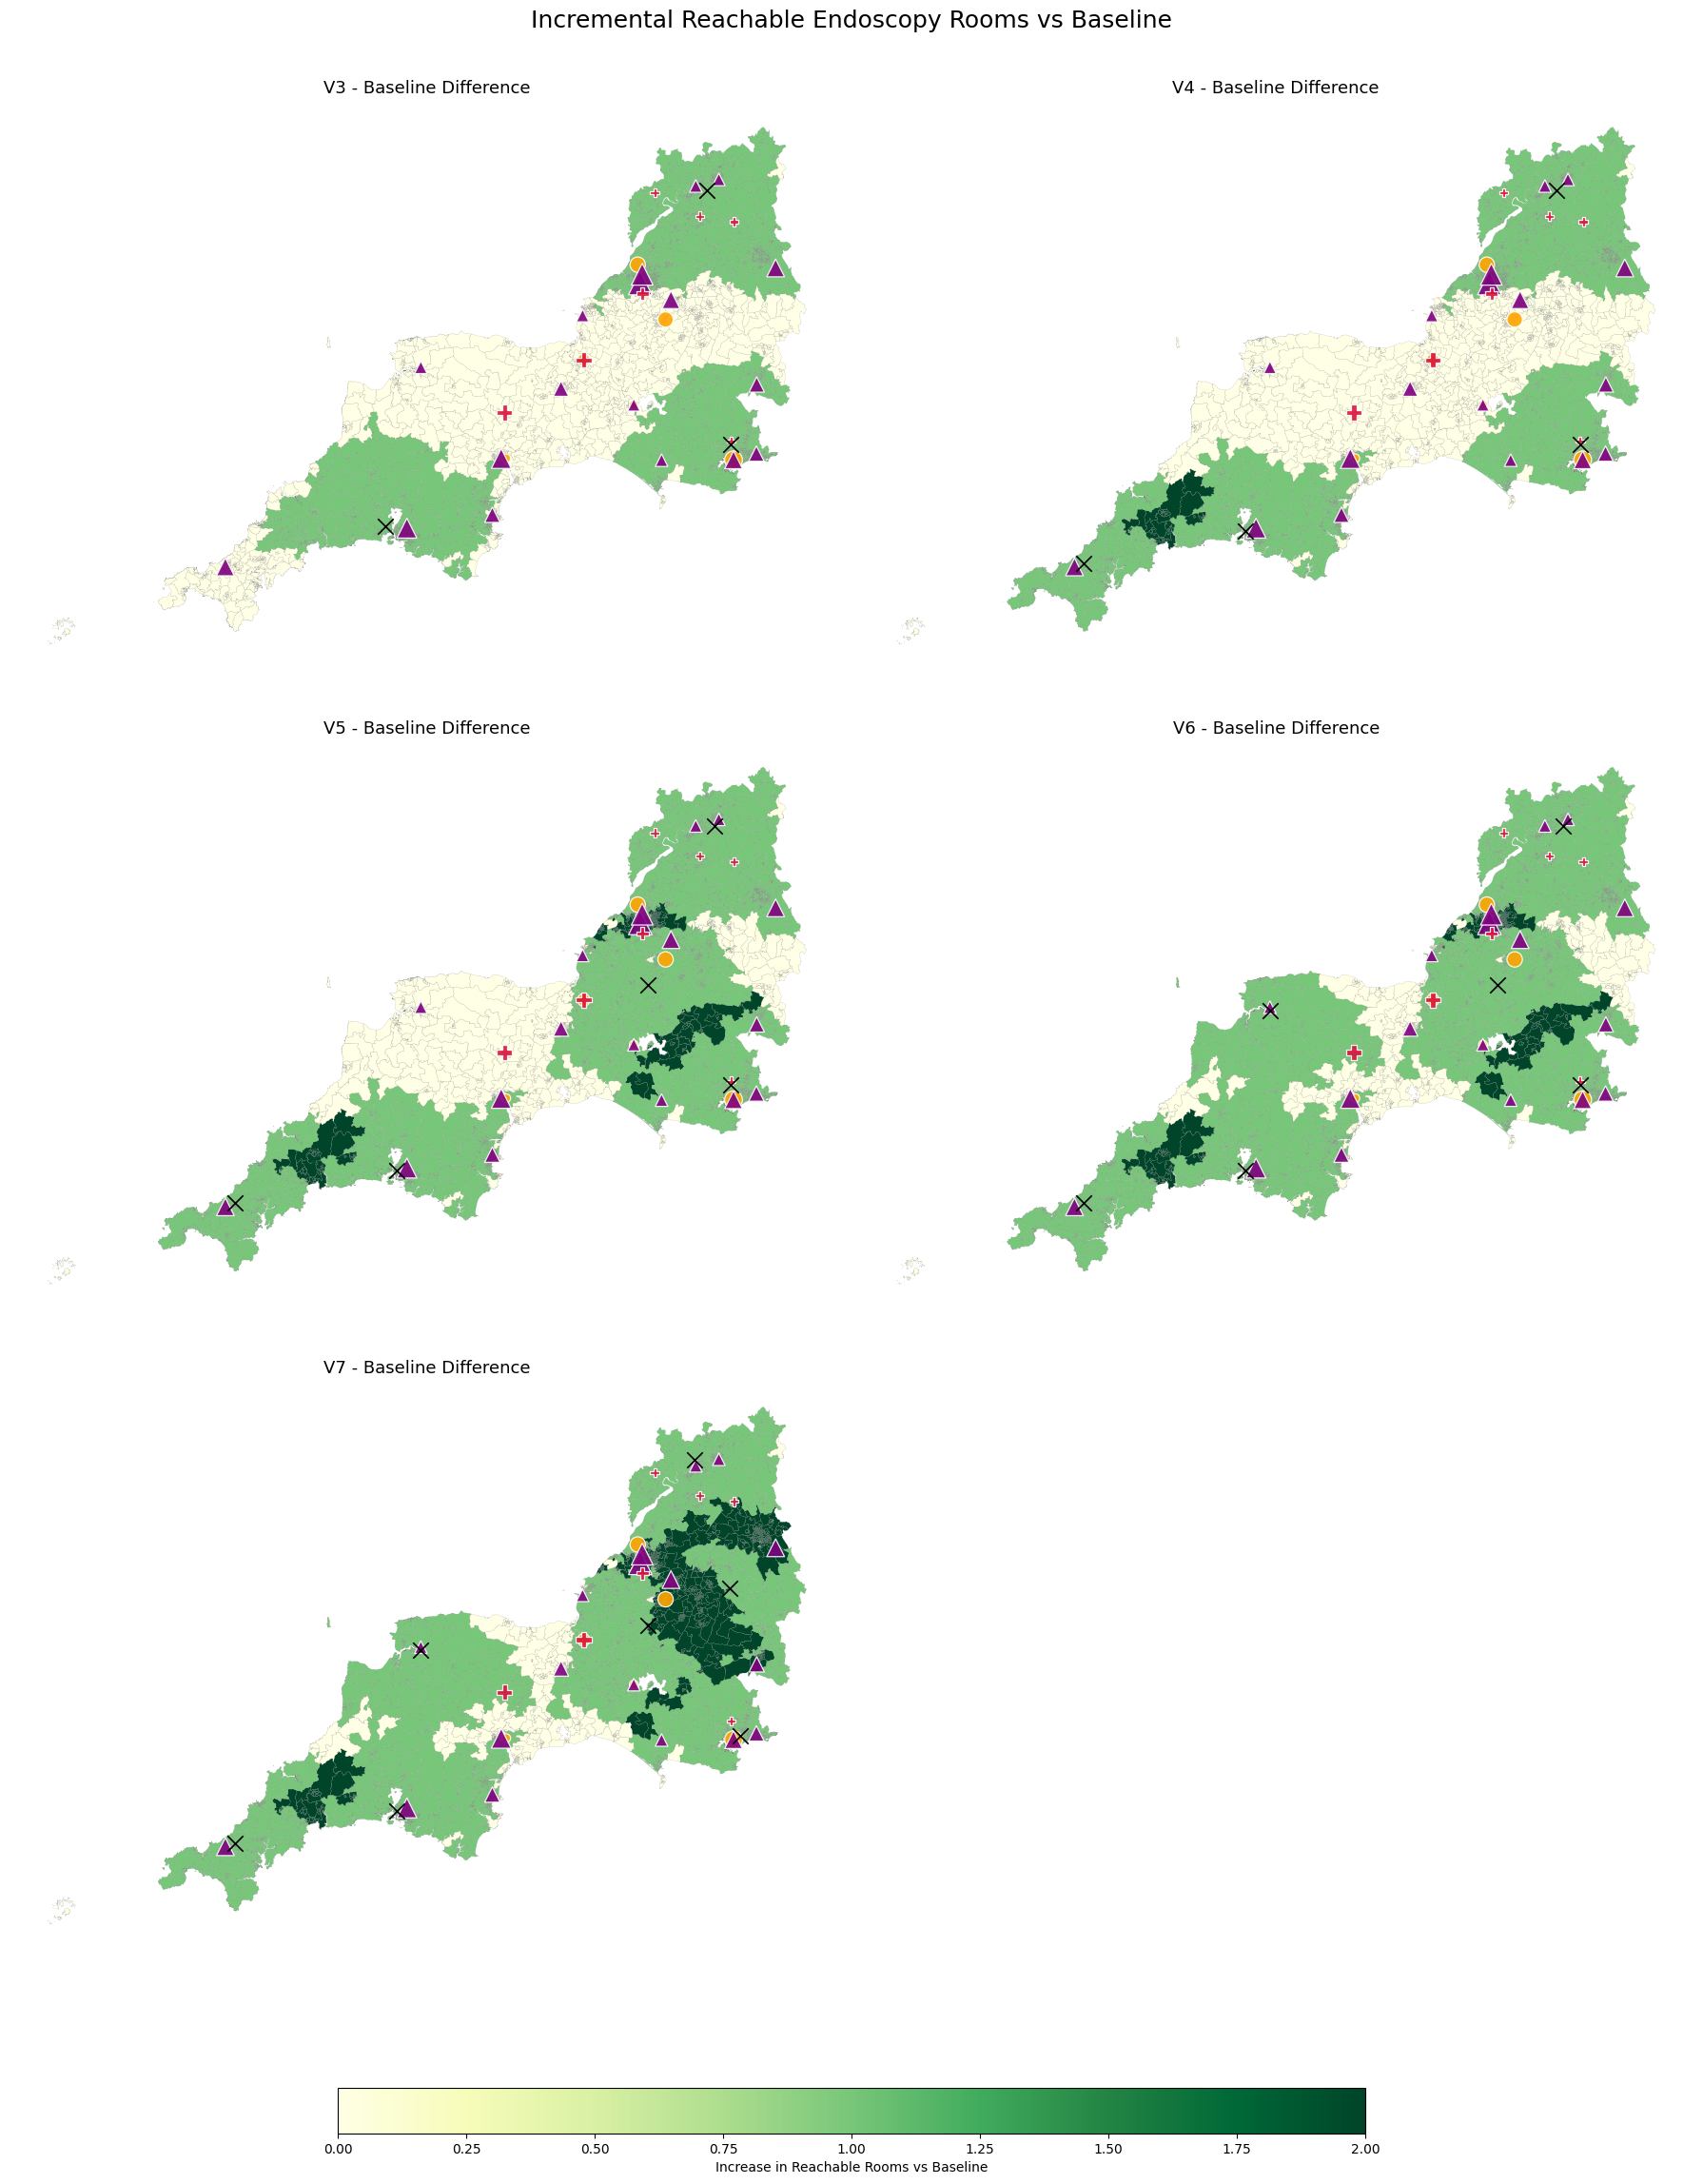

In [33]:
# ----------------------------------------------------------
# Incremental Reachable Rooms vs Baseline (V3–V7)
# Updates: colours (CDC=orange, Acute=purple, Community=crimson),
# Proposed sites = black crosses; colourbar starts at 0 (yellow)
# ----------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import numpy as np

# Step 1: Calculate reachable rooms for Baseline and all scenarios
reachable_by_scenario = {}
for scen, df in travel_ready_by_scenario.items():
    reachable_rooms = (
        df.groupby("origin_name", as_index=False)["rooms_at_destination"]
          .sum()
          .rename(columns={
              "origin_name": "lsoa21cd",
              "rooms_at_destination": "reachable_rooms_60min"
          })
    )
    reachable_by_scenario[scen] = reachable_rooms

# Step 2: Compute difference vs Baseline for V3–V7 only (clip negatives to 0)
diff_by_scenario = {}
baseline = reachable_by_scenario["Baseline"]
for scen in ["V3", "V4", "V5", "V6", "V7"]:
    diff = baseline.merge(
        reachable_by_scenario[scen], on="lsoa21cd", how="outer",
        suffixes=('_base', '_scen')
    ).fillna(0)
    diff["diff_rooms"] = diff["reachable_rooms_60min_scen"] - diff["reachable_rooms_60min_base"]
    # No negative change visualised
    diff["diff_rooms"] = np.clip(diff["diff_rooms"], 0, None)
    diff_by_scenario[scen] = diff[["lsoa21cd", "diff_rooms"]]

# Step 3: Shared colour scale (start at 0; 99th percentile cap for robustness)
all_diffs = np.concatenate([df["diff_rooms"].values for df in diff_by_scenario.values()])
vmin = 0.0
vmax = float(np.percentile(all_diffs, 99)) if np.any(all_diffs > 0) else 1.0

# Step 4: Setup 3x2 plot grid (last panel empty)
fig, axes = plt.subplots(3, 2, figsize=(18, 24))
axes = axes.flatten()

marker_styles = [
    ("CDC", "orange", "o"),
    ("Acute", "purple", "^"),
    ("Community", "crimson", "P"),
    ("Proposed", "black", "x"),  # black crosses
]

scenarios = ["V3", "V4", "V5", "V6", "V7"]

for i, scen in enumerate(scenarios):
    ax = axes[i]
    diff_map = (
        lsoa_gdf[["lsoa21cd", "geometry"]]
        .merge(diff_by_scenario[scen], on="lsoa21cd", how="left")
        .fillna({"diff_rooms": 0})
    )

    # Plot difference choropleth (sequential YlGn: 0 = yellow)
    diff_map.plot(
        column="diff_rooms",
        cmap="YlGn",
        linewidth=0.1,
        edgecolor="grey",
        legend=False,
        vmin=vmin,
        vmax=vmax,
        ax=ax
    )

    # Overlay facilities including Proposed sites (centroids for clarity)
    fac_gdf = facilities_by_scenario[scen].copy()
    fac_gdf["geometry"] = fac_gdf.geometry.centroid

    for label, colour, marker in marker_styles:
        subset = fac_gdf[fac_gdf["source"] == label]
        if not subset.empty:
            size = 140 if label == "Proposed" else subset["Endoscopy Rooms"] * 45
            subset.plot(
                ax=ax,
                color=colour,
                markersize=size,
                marker=marker,
                label=label,
                alpha=1.0 if label == "Proposed" else 0.9,
                edgecolor="white" if label != "Proposed" else "black",
                linewidth=0.9 if label != "Proposed" else 1.2,
                zorder=3
            )

    ax.set_title(f"{scen} - Baseline Difference", fontsize=13)
    ax.axis("off")

# Hide last empty subplot
axes[-1].axis("off")

# Step 5: Shared colourbar (0 → yellow to green)
cax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
sm = plt.cm.ScalarMappable(cmap="YlGn", norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, orientation="horizontal",
             label="Increase in Reachable Rooms vs Baseline")

plt.tight_layout(rect=[0, 0.1, 1, 0.97])
plt.suptitle("Incremental Reachable Endoscopy Rooms vs Baseline", fontsize=18)

# 300 dpi export
fig.savefig("Incremental_Reachable_Endoscopy_Rooms_vs_Baseline_V3-V7.png",
            dpi=300, bbox_inches="tight")
plt.show()


In [34]:
# ----------------------------------------------------------
# Step 6 – Competition-Adjusted Rooms per 100k (≤60 min) — EXTENDED
# Keeps LSOAs with no OD rows and labels them "No Access"
# ----------------------------------------------------------

all_lsoas = lsoa_gdf["lsoa21cd"].astype(str).unique()
universe = pd.DataFrame({"lsoa21cd": all_lsoas})

competition_access_by_scenario = {}
competition_access_extended_by_scenario = {}

def classify_access(x):
    if pd.isna(x) or x == 0:
        return "No Access"
    elif x < 3.5:
        return "Low"
    elif x < 4.0:
        return "Marginal"
    else:
        return "Adequate"

for scen, travel_df_60 in travel_ready_by_scenario.items():
    print(f"\nProcessing competition-adjusted access for {scen}...")

    # 6.1 Competing pop per destination (within ≤60)
    facility_pop = (
        travel_df_60
        .groupby("destination_name", as_index=False)["pop_50_74"]
        .sum()
        .rename(columns={"pop_50_74": "competing_pop_50_74"})
    )

    # 6.2 Merge and compute per-100k contribution
    merged = travel_df_60.merge(facility_pop, on="destination_name", how="left")
    merged["room_contrib_per_100k"] = (
        merged["rooms_at_destination"] / merged["competing_pop_50_74"].replace(0, np.nan)
    ) * 100_000

    # 6.3 Aggregate per origin (ONLY those with any OD rows)
    scored = (
        merged.groupby("origin_name", as_index=False)["room_contrib_per_100k"]
        .sum()
        .rename(columns={"origin_name": "lsoa21cd",
                         "room_contrib_per_100k": "rooms_per_100k_competition"})
    )
    competition_access_by_scenario[scen] = scored.copy()

    # 6.4 EXTEND to full LSOA universe (bring back the dropped origins as zeros)
    extended = (
        universe.merge(scored, on="lsoa21cd", how="left")
        .fillna({"rooms_per_100k_competition": 0})
    )
    extended["access_flag"] = extended["rooms_per_100k_competition"].apply(classify_access)
    competition_access_extended_by_scenario[scen] = extended

    # Quick diagnostics
    n_scored = scored.shape[0]
    n_total = extended.shape[0]
    n_no_access = (extended["rooms_per_100k_competition"] == 0).sum()
    print(f"  Scored origins (had OD ≤60): {n_scored:,} / {n_total:,} total")
    print(f"  'No Access' (zeros)       : {n_no_access:,}")



Processing competition-adjusted access for Baseline...
  Scored origins (had OD ≤60): 3,419 / 3,451 total
  'No Access' (zeros)       : 32

Processing competition-adjusted access for V3...
  Scored origins (had OD ≤60): 3,436 / 3,451 total
  'No Access' (zeros)       : 15

Processing competition-adjusted access for V4...
  Scored origins (had OD ≤60): 3,433 / 3,451 total
  'No Access' (zeros)       : 18

Processing competition-adjusted access for V5...
  Scored origins (had OD ≤60): 3,433 / 3,451 total
  'No Access' (zeros)       : 18

Processing competition-adjusted access for V6...
  Scored origins (had OD ≤60): 3,435 / 3,451 total
  'No Access' (zeros)       : 16

Processing competition-adjusted access for V7...
  Scored origins (had OD ≤60): 3,435 / 3,451 total
  'No Access' (zeros)       : 16


In [35]:
def classify_access_extended(x):
    if pd.isna(x) or x == 0:
        return "No Access"
    elif x < 3.5:
        return "Low"
    elif x < 4.0:
        return "Marginal"
    else:
        return "Adequate"

competition_access_extended_by_scenario = {}

for scen, comp_access in competition_access_by_scenario.items():
    extended = lsoa_gdf[["lsoa21cd"]].merge(
        comp_access, on="lsoa21cd", how="left"
    )
    extended["rooms_per_100k_competition"] = extended["rooms_per_100k_competition"].fillna(0)
    extended["access_flag"] = extended["rooms_per_100k_competition"].apply(classify_access_extended)
    
    competition_access_extended_by_scenario[scen] = extended
    
    print(f"\n{scen} - Extended competition access (all LSOAs):")
    display(extended.head())
    display(extended["access_flag"].value_counts())



Baseline - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.295663,Low
1,E01020481,0.999220,Low
2,E01020482,2.295663,Low
3,E01020479,2.295663,Low
4,E01020478,2.295663,Low


access_flag
Low          1609
Adequate     1386
Marginal      424
No Access      32
Name: count, dtype: int64


V3 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1594
Low          1272
Marginal      570
No Access      15
Name: count, dtype: int64


V4 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1593
Low          1238
Marginal      602
No Access      18
Name: count, dtype: int64


V5 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1675
Low          1215
Marginal      543
No Access      18
Name: count, dtype: int64


V6 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1733
Low          1157
Marginal      545
No Access      16
Name: count, dtype: int64


V7 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.681524,Low
1,E01020481,1.385081,Low
2,E01020482,2.681524,Low
3,E01020479,2.681524,Low
4,E01020478,2.681524,Low


access_flag
Adequate     1767
Low          1097
Marginal      571
No Access      16
Name: count, dtype: int64

In [36]:
lsoa_access_gdf_by_scenario = {}

for scen, extended in competition_access_extended_by_scenario.items():
    merged = lsoa_gdf.merge(extended, on="lsoa21cd", how="left")
    lsoa_access_gdf_by_scenario[scen] = merged
    print(f"\n{scen} - GeoDataFrame merged with competition access:")
    display(merged[["lsoa21cd", "rooms_per_100k_competition", "access_flag"]].head())



Baseline - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.295663,Low
1,E01020481,0.999220,Low
2,E01020482,2.295663,Low
3,E01020479,2.295663,Low
4,E01020478,2.295663,Low



V3 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V4 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V5 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V6 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V7 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.681524,Low
1,E01020481,1.385081,Low
2,E01020482,2.681524,Low
3,E01020479,2.681524,Low
4,E01020478,2.681524,Low


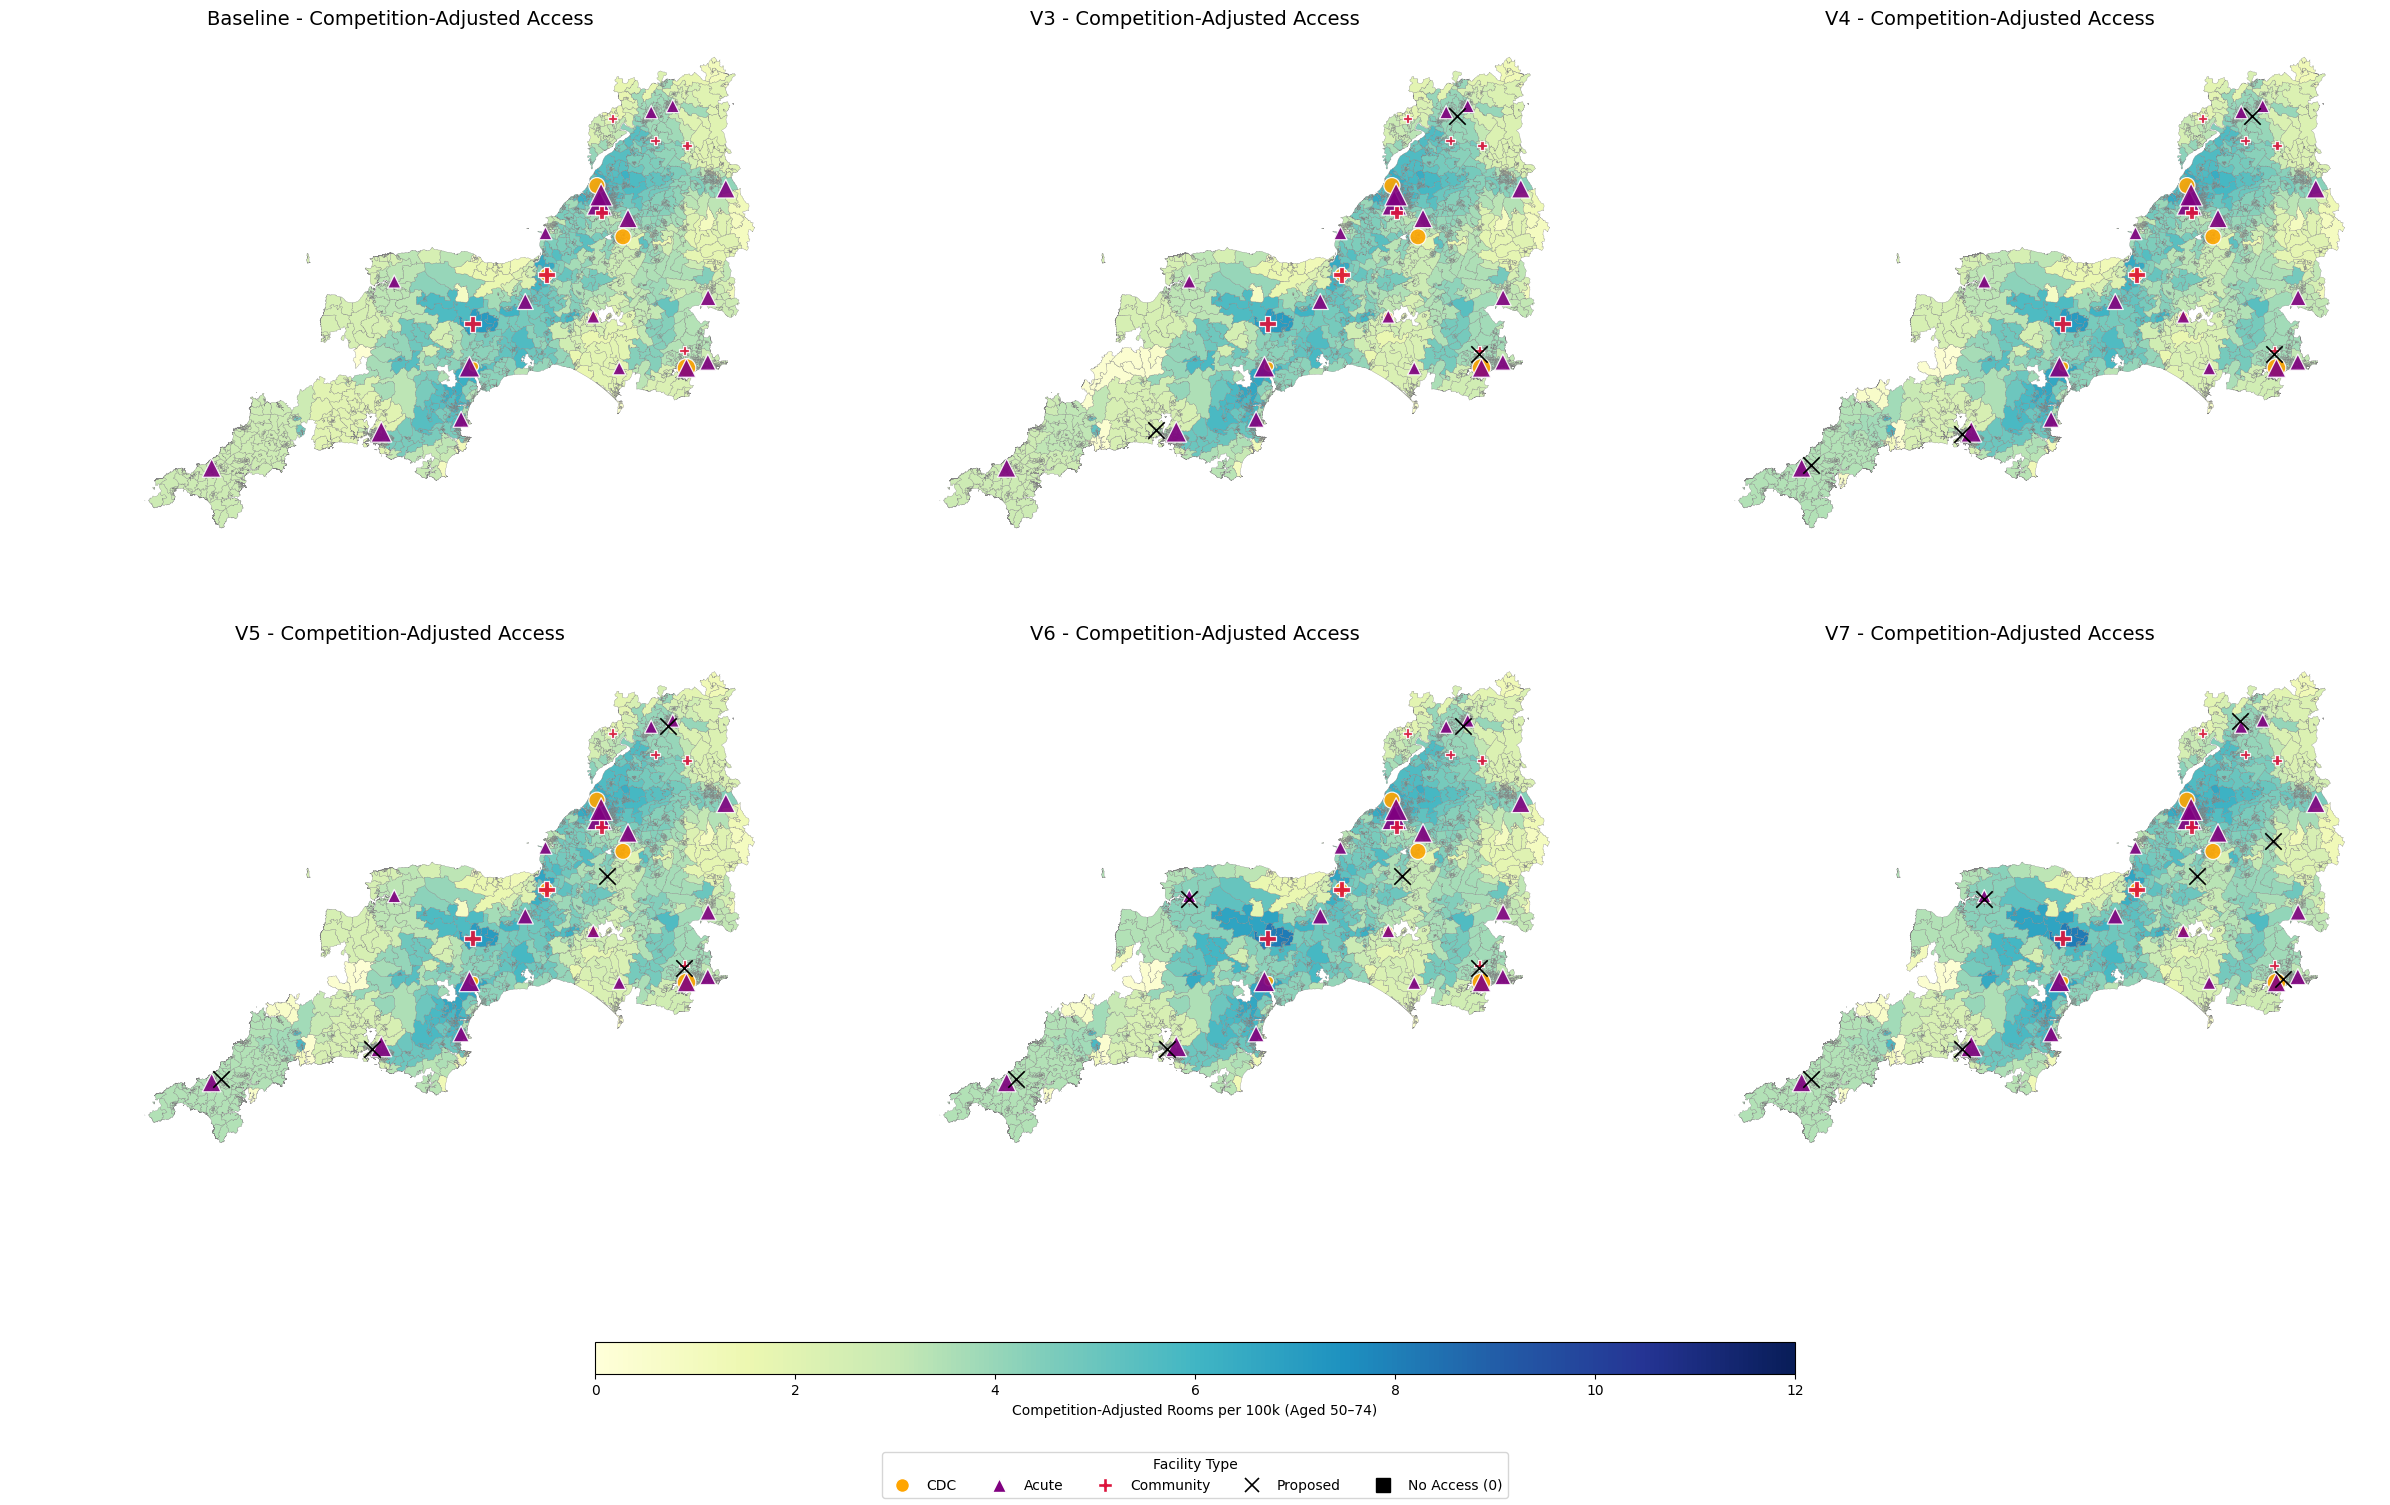

In [49]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import numpy as np

# Define scenarios and marker styles
scenarios = ["Baseline", "V3", "V4", "V5", "V6", "V7"]
marker_styles = [
    ("CDC", "orange", "o"),
    ("Acute", "purple", "^"),
    ("Community", "crimson", "P"),
    ("Proposed", "black", "x"),  # black crosses
]

val_col = "rooms_per_100k_competition"
vmin, vmax = 0, 12
epsilon = 1e-9  # avoids mapping zeros to the colour scale

fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()

for i, scen in enumerate(scenarios):
    ax = axes[i]
    gdf = lsoa_access_gdf_by_scenario[scen].copy()  # ideally this is your *extended* df incl. all LSOAs

    # --- A) paint "No Access" (zeros) in BLACK underneath
    mask_zero = (gdf[val_col].fillna(0) == 0)
    if mask_zero.any():
        gdf.loc[mask_zero].plot(ax=ax, color="white", linewidth=0.0, zorder=1)

    # --- B) overlay >0 with the colour scale
    mask_pos = ~mask_zero
    if mask_pos.any():
        gdf.loc[mask_pos].plot(
            column=val_col,
            cmap="YlGnBu",
            norm=Normalize(vmin=epsilon, vmax=vmax),  # start just above 0
            linewidth=0.2, edgecolor="grey",
            legend=False, ax=ax, zorder=2
        )

    # Facilities
    fac_gdf = facilities_by_scenario[scen].copy()
    fac_gdf["geometry"] = fac_gdf["geometry"].centroid
    for label, colour, marker in marker_styles:
        subset = fac_gdf[fac_gdf["source"] == label]
        if not subset.empty:
            size = 140 if label == "Proposed" else subset["Endoscopy Rooms"] * 45
            subset.plot(
                ax=ax,
                color=colour, marker=marker, markersize=size,
                alpha=1.0 if label == "Proposed" else 0.9,
                edgecolor="black" if label == "Proposed" else "white",
                linewidth=1.2 if label == "Proposed" else 0.9,
                zorder=3
            )

    ax.set_title(f"{scen} - Competition-Adjusted Access", fontsize=14)
    ax.axis("off")

# Hide any unused axes
for j in range(len(scenarios), len(axes)):
    axes[j].axis("off")

# Shared colourbar (0–vmax); note zeros are shown separately as black
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=Normalize(vmin=0, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbar_ax, orientation="horizontal",
             label="Competition-Adjusted Rooms per 100k (Aged 50–74)")

# Shared legend incl. No Access patch
legend_elements = [
    Line2D([0], [0], marker="o", linestyle="", color="w",
           markerfacecolor="orange", markeredgecolor="white", markeredgewidth=1.0,
           label="CDC", markersize=10),
    Line2D([0], [0], marker="^", linestyle="", color="w",
           markerfacecolor="purple", markeredgecolor="white", markeredgewidth=1.0,
           label="Acute", markersize=10),
    Line2D([0], [0], marker="P", linestyle="", color="w",
           markerfacecolor="crimson", markeredgecolor="white", markeredgewidth=1.0,
           label="Community", markersize=10),
    Line2D([0], [0], marker="x", linestyle="", color="black",
           markerfacecolor="black", markeredgecolor="black", markeredgewidth=1.2,
           label="Proposed", markersize=10),
    Line2D([0], [0], linestyle="", marker="s", color="black",
           markerfacecolor="black", markeredgecolor="black",
           label="No Access (0)", markersize=10),
]
fig.legend(handles=legend_elements, loc='lower center', ncol=5, title='Facility Type')

plt.tight_layout(rect=[0, 0.12, 1, 1])

# 300 dpi export
fig.savefig("Competition_Adjusted_Access_By_Scenario_with_NoAccessBlack.png",
            dpi=300, bbox_inches="tight")

plt.show()


In [38]:
# Step 1: Descriptive summary statistics per scenario
summary_stats = {}

for scen, comp_access in competition_access_by_scenario.items():
    desc = comp_access["rooms_per_100k_competition"].describe(percentiles=[0.25, 0.5, 0.75])
    summary_stats[scen] = {
        "mean": desc["mean"],
        "median": desc["50%"],
        "iqr": desc["75%"] - desc["25%"],
        "count": desc["count"],
        "min": desc["min"],
        "max": desc["max"],
        "std": desc["std"]
    }
    print(f"\n{scen} Summary:")
    print(desc[["count", "min", "25%", "50%", "75%", "max", "mean", "std"]])



Baseline Summary:
count    3419.000000
min         0.230103
25%         2.790664
50%         3.698153
75%         4.618591
max         7.836887
mean        3.761326
std         1.205418
Name: rooms_per_100k_competition, dtype: float64

V3 Summary:
count    3436.000000
min         0.363678
25%         3.091598
50%         3.763902
75%         4.732144
max         8.200565
mean        3.903186
std         1.225458
Name: rooms_per_100k_competition, dtype: float64

V4 Summary:
count    3433.000000
min         0.230103
25%         3.206271
50%         3.779120
75%         4.732144
max         7.836887
mean        3.956541
std         1.195588
Name: rooms_per_100k_competition, dtype: float64

V5 Summary:
count    3433.000000
min         0.230103
25%         3.239143
50%         3.872519
75%         4.807600
max         7.836887
mean        4.013433
std         1.215812
Name: rooms_per_100k_competition, dtype: float64

V6 Summary:
count    3435.000000
min         0.230103
25%         3.41634

In [17]:
# Step 2: Population-weighted mean rooms_per_100k_competition per scenario

pop_weighted_means = {}

for scen, comp_access in competition_access_by_scenario.items():
    merged = comp_access.merge(lsoa_pop[["lsoa21cd", "pop_50_74"]], on="lsoa21cd", how="left")
    weighted_mean = (merged["rooms_per_100k_competition"] * merged["pop_50_74"]).sum() / merged["pop_50_74"].sum()
    pop_weighted_means[scen] = weighted_mean
    print(f"{scen}: Population-weighted mean rooms per 100k = {weighted_mean:.3f}")


Baseline: Population-weighted mean rooms per 100k = 3.695
V3: Population-weighted mean rooms per 100k = 3.831
V4: Population-weighted mean rooms per 100k = 3.890
V5: Population-weighted mean rooms per 100k = 3.943
V6: Population-weighted mean rooms per 100k = 3.993
V7: Population-weighted mean rooms per 100k = 4.046


In [44]:
# ----------------------------------------------------------
# Step 3 — Counts & Proportions of LSOAs per access_flag (by scenario)
# and
# Step 4 — Access-flag Transition Matrices (Baseline → Scenario)
# (Updated to include ALL LSOAs and a fixed flag order, using the *extended* tables if available)
# ----------------------------------------------------------
import pandas as pd

# Prefer the extended dict (includes zero-access LSOAs); fall back if not present
src = (
    competition_access_extended_by_scenario
    if "competition_access_extended_by_scenario" in globals()
    else competition_access_by_scenario
)

# Fixed ordering for readability
FLAG_ORDER = ["No Access", "Low", "Marginal", "Adequate"]

def _ensure_complete_flags(df: pd.DataFrame) -> pd.DataFrame:
    """Ensure every LSOA is present and flags are ordered; fill missing as 'No Access'."""
    out = df.copy()
    # If not already complete, merge onto the full universe of LSOAs
    if out.shape[0] < len(lsoa_gdf):
        out = (
            lsoa_gdf[["lsoa21cd"]]
            .merge(out, on="lsoa21cd", how="left")
        )
    # Fill missing scores/flags sensibly
    if "rooms_per_100k_competition" in out.columns:
        out["rooms_per_100k_competition"] = out["rooms_per_100k_competition"].fillna(0)
    out["access_flag"] = out.get("access_flag").fillna("No Access")
    out["access_flag"] = pd.Categorical(out["access_flag"], categories=FLAG_ORDER, ordered=True)
    return out

# ---------- Step 3: Counts & proportions by scenario ----------
print("\n=== Access Flags by Scenario (counts & proportions) ===")
counts_summary = []
props_summary = []

for scen, comp_access in src.items():
    df = _ensure_complete_flags(comp_access)

    counts = df["access_flag"].value_counts().reindex(FLAG_ORDER).fillna(0).astype(int)
    props  = df["access_flag"].value_counts(normalize=True).reindex(FLAG_ORDER).fillna(0.0)

    print(f"\n{scen} — Access Flag Counts:")
    print(counts.to_string())

    print(f"\n{scen} — Access Flag Proportions:")
    print((props.round(4)).to_string())

    counts_summary.append(pd.Series(counts, name=scen))
    props_summary.append(pd.Series(props, name=scen))

# Optional: tidy scenario-by-flag summary tables
counts_table = pd.DataFrame(counts_summary).T[sorted(src.keys(), key=lambda x: (x!="Baseline", x))]
props_table  = pd.DataFrame(props_summary).T[sorted(src.keys(), key=lambda x: (x!="Baseline", x))]

# Uncomment to inspect/keep:
# display(counts_table)
# display(props_table.style.format("{:.2%}"))

# ---------- Step 4: Transition matrices (Baseline → each Scenario) ----------
from pandas.api.types import CategoricalDtype

FLAG_ORDER = ["No Access", "Low", "Marginal", "Adequate"]
cat = CategoricalDtype(categories=FLAG_ORDER, ordered=True)

baseline_df = _ensure_complete_flags(src["Baseline"])[["lsoa21cd", "access_flag"]].rename(
    columns={"access_flag": "baseline_flag"}
)

for scen in [s for s in src.keys() if s != "Baseline"]:
    scen_df = _ensure_complete_flags(src[scen])[["lsoa21cd", "access_flag"]].rename(
        columns={"access_flag": "scenario_flag"}
    )

    merged = baseline_df.merge(scen_df, on="lsoa21cd", how="outer")

    # ✅ Fill NA safely and recast to fixed-order categorical (no add_categories)
    for col in ["baseline_flag", "scenario_flag"]:
        merged[col] = merged[col].astype("object").fillna("No Access").astype(cat)

    # % transition matrix (row-normalised)
    trans_pct = (
        pd.crosstab(merged["baseline_flag"], merged["scenario_flag"], normalize="index", dropna=False)
          .reindex(index=FLAG_ORDER, columns=FLAG_ORDER)
          .fillna(0.0) * 100
    )

    # (optional) counts matrix
    # trans_counts = (
    #     pd.crosstab(merged["baseline_flag"], merged["scenario_flag"], dropna=False)
    #       .reindex(index=FLAG_ORDER, columns=FLAG_ORDER)
    #       .fillna(0).astype(int)
    # )

    print(f"\nBaseline → {scen}:")
    display(trans_pct.round(2))
    # display(trans_counts)




=== Access Flags by Scenario (counts & proportions) ===

Baseline — Access Flag Counts:
access_flag
No Access      32
Low          1609
Marginal      424
Adequate     1386

Baseline — Access Flag Proportions:
access_flag
No Access    0.0093
Low          0.4662
Marginal     0.1229
Adequate     0.4016

V3 — Access Flag Counts:
access_flag
No Access      15
Low          1272
Marginal      570
Adequate     1594

V3 — Access Flag Proportions:
access_flag
No Access    0.0043
Low          0.3686
Marginal     0.1652
Adequate     0.4619

V4 — Access Flag Counts:
access_flag
No Access      18
Low          1238
Marginal      602
Adequate     1593

V4 — Access Flag Proportions:
access_flag
No Access    0.0052
Low          0.3587
Marginal     0.1744
Adequate     0.4616

V5 — Access Flag Counts:
access_flag
No Access      18
Low          1215
Marginal      543
Adequate     1675

V5 — Access Flag Proportions:
access_flag
No Access    0.0052
Low          0.3521
Marginal     0.1573
Adequate     0.4854

scenario_flag,No Access,Low,Marginal,Adequate
baseline_flag,,,,
No Access,46.88,53.12,0.00,0.00
Low,0.00,78.00,22.00,0.00
Marginal,0.00,0.00,50.94,49.06
Adequate,0.00,0.00,0.00,100.00



Baseline → V4:


scenario_flag,No Access,Low,Marginal,Adequate
baseline_flag,,,,
No Access,56.25,43.75,0.00,0.00
Low,0.00,76.07,23.93,0.00
Marginal,0.00,0.00,51.18,48.82
Adequate,0.00,0.00,0.00,100.00



Baseline → V5:


scenario_flag,No Access,Low,Marginal,Adequate
baseline_flag,,,,
No Access,56.25,43.75,0.00,0.00
Low,0.00,74.64,25.30,0.06
Marginal,0.00,0.00,32.08,67.92
Adequate,0.00,0.00,0.00,100.00



Baseline → V6:


scenario_flag,No Access,Low,Marginal,Adequate
baseline_flag,,,,
No Access,50.0,50.00,0.00,0.00
Low,0.0,70.91,25.48,3.60
Marginal,0.0,0.00,31.84,68.16
Adequate,0.0,0.00,0.00,100.00



Baseline → V7:


scenario_flag,No Access,Low,Marginal,Adequate
baseline_flag,,,,
No Access,50.0,50.00,0.00,0.00
Low,0.0,67.18,29.21,3.60
Marginal,0.0,0.00,23.82,76.18
Adequate,0.0,0.00,0.00,100.00


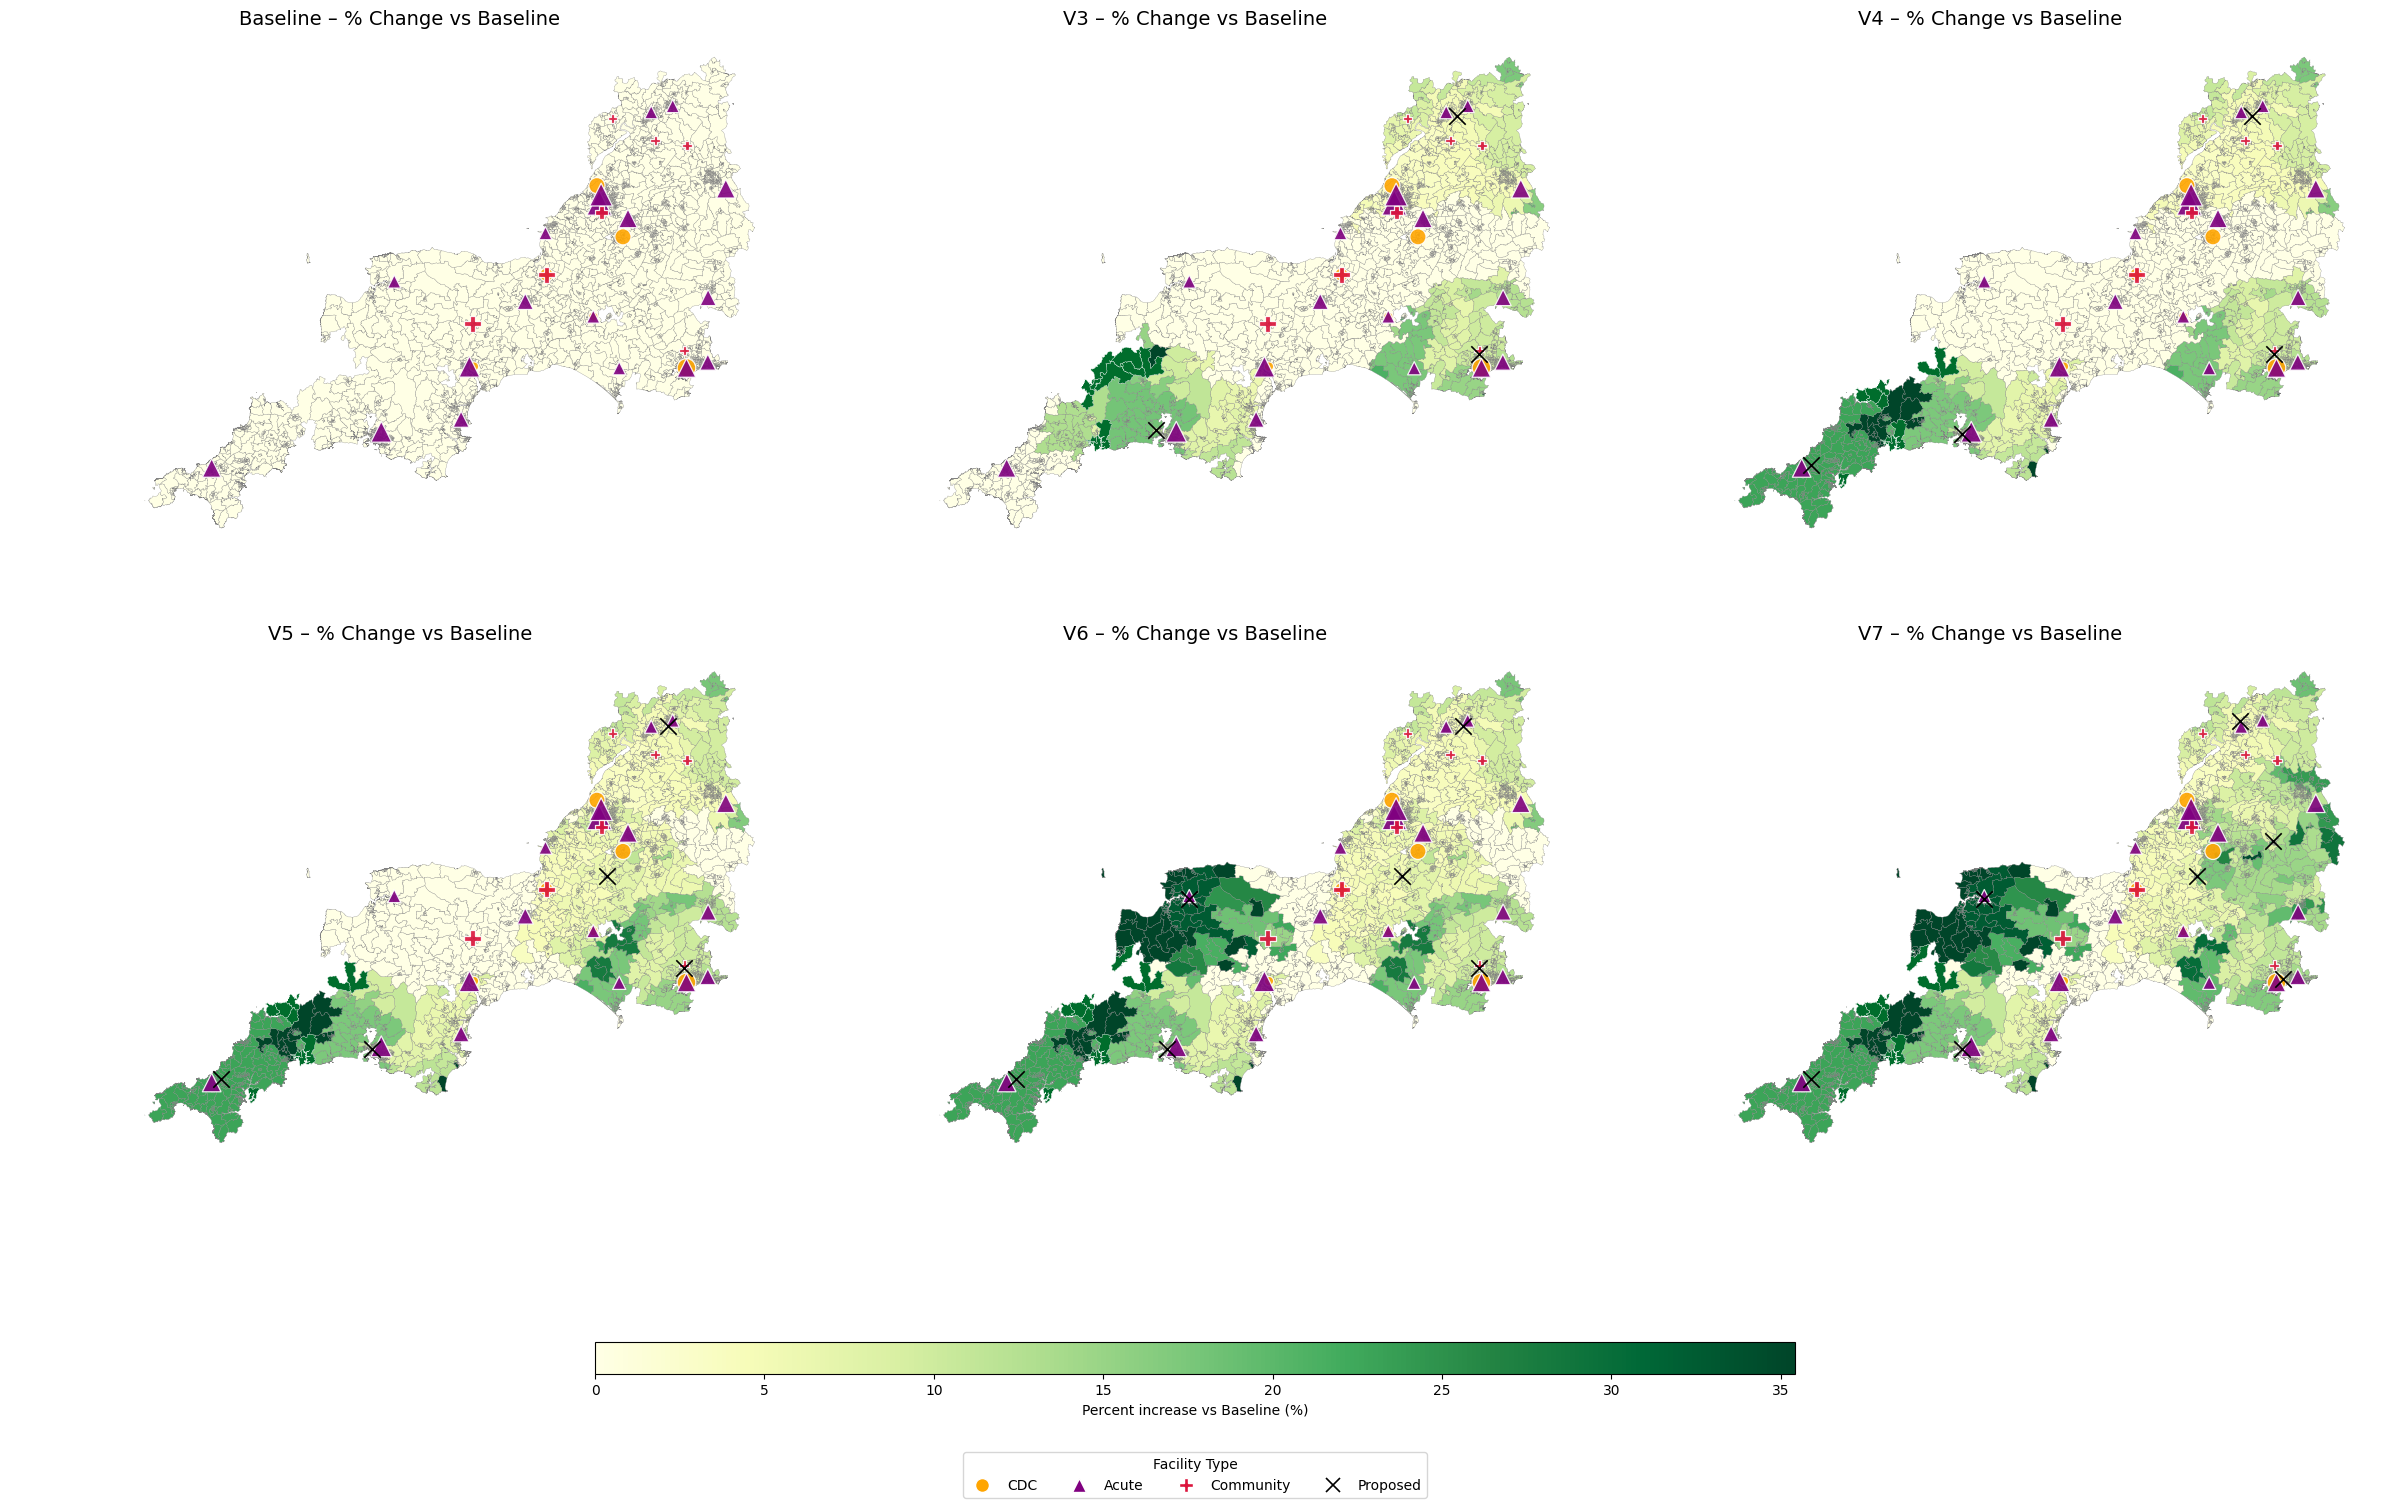

In [51]:
# --- 1) Build % change and flags
base_df = lsoa_access_gdf_by_scenario["Baseline"][["lsoa21cd", val_col]].rename(
    columns={val_col: "base_val"}
)

pct_gdfs = {}
for scen in scenarios:
    scen_df = lsoa_access_gdf_by_scenario[scen][["lsoa21cd", "geometry", val_col]].copy()
    gdf = scen_df.merge(base_df, on="lsoa21cd", how="left")

    # Fill NaNs with 0 for logic; keep original columns intact if you need them
    scen_val = gdf[val_col].fillna(0)
    base_val = gdf["base_val"].fillna(0)

    # Flags
    gdf["still_unserved"] = (base_val == 0) & (scen_val == 0)
    gdf["newly_served"]  = (base_val == 0) & (scen_val > 0)

    # % change only for those with baseline > 0
    with np.errstate(divide="ignore", invalid="ignore"):
        pct = 100.0 * (scen_val - base_val) / base_val
    pct[base_val == 0] = np.nan                 # exclude baseline-zero from color scale
    gdf["pct_change_vs_base"] = np.clip(pct, 0, None)  # keep positives; 0 = yellow

    pct_gdfs[scen] = gdf

# --- 2) Shared colour scale from served-only (robust cap)
all_vals = np.concatenate([d["pct_change_vs_base"].to_numpy() for d in pct_gdfs.values()])
all_vals = all_vals[~np.isnan(all_vals)]
vmin, vmax = 0.0, (float(np.percentile(all_vals, 99)) if all_vals.size else 1.0)
norm = Normalize(vmin=vmin, vmax=vmax)

# --- 3) Plot
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()

for i, scen in enumerate(scenarios):
    ax = axes[i]
    gdf = pct_gdfs[scen]

    # A) paint "still unserved" first (black)
    mask_still = gdf["still_unserved"]
    if mask_still.any():
        gdf.loc[mask_still].plot(ax=ax, color="white", linewidth=0.0, zorder=1,edgecolor="grey",)

    # B) choropleth for % increase where baseline > 0
    mask_served = ~mask_still & ~gdf["newly_served"]
    gdf.loc[mask_served].plot(
        column="pct_change_vs_base",
        cmap="YlGn",
        norm=norm,
        linewidth=0.2, edgecolor="grey",
        legend=False, ax=ax, zorder=2
    )

    # C) overlay "newly served" (dark green) so they pop
    mask_new = gdf["newly_served"]
    if mask_new.any():
        gdf.loc[mask_new].plot(ax=ax, color="#006d2c", edgecolor="white",
                               linewidth=0.2, zorder=3)

    # Facilities (as you had)
    fac = facilities_by_scenario[scen].copy()
    fac["geometry"] = fac.geometry.centroid
    for label, colour, marker in marker_styles:
        sub = fac[fac["source"] == label]
        if not sub.empty:
            size = 140 if label == "Proposed" else sub["Endoscopy Rooms"] * 45
            sub.plot(ax=ax, color=colour, markersize=size, marker=marker,
                     alpha=1.0 if label == "Proposed" else 0.9,
                     edgecolor="black" if label == "Proposed" else "white",
                     linewidth=1.2 if label == "Proposed" else 0.9, zorder=4)

    ax.set_title(f"{scen} – % Change vs Baseline", fontsize=14)
    ax.axis("off")

# shared colourbar and legend unchanged...


# Hide any unused axes
for j in range(len(scenarios), len(axes)):
    axes[j].axis("off")

# --- 4) Shared colourbar (0 → yellow to green)
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])
sm = plt.cm.ScalarMappable(cmap="YlGn", norm=norm)
sm._A = []
fig.colorbar(sm, cax=cbar_ax, orientation="horizontal",
             label="Percent increase vs Baseline (%)")

# --- 5) Single legend for markers
legend_elements = [
    Line2D([0], [0], marker="o", linestyle="", color="w",
           markerfacecolor="orange", markeredgecolor="white", markeredgewidth=1.0,
           label="CDC", markersize=10),
    Line2D([0], [0], marker="^", linestyle="", color="w",
           markerfacecolor="purple", markeredgecolor="white", markeredgewidth=1.0,
           label="Acute", markersize=10),
    Line2D([0], [0], marker="P", linestyle="", color="w",
           markerfacecolor="crimson", markeredgecolor="white", markeredgewidth=1.0,
           label="Community", markersize=10),
    Line2D([0], [0], marker="x", linestyle="", color="black",
           markerfacecolor="black", markeredgecolor="black", markeredgewidth=1.2,
           label="Proposed", markersize=10),
]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, title='Facility Type')

plt.tight_layout(rect=[0, 0.12, 1, 1])

# --- 6) 300 dpi export
fig.savefig("Pct_Increase_vs_Baseline_By_Scenario.png", dpi=300, bbox_inches="tight")

plt.show()
